In [1]:
#importing numpy library to wotk with arrays
import pandas as pd


#importing matplotlib for visualizing the data
import matplotlib.pyplot as plt


#importing train_test_split library to split the data
from sklearn.model_selection import train_test_split

#Importing logistic regression model
from sklearn.linear_model import LogisticRegression

#importing the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

#importing metrics library
from sklearn import metrics

#importing accuracy score from the mertrics library to check the accuracy of the model
from sklearn.metrics import accuracy_score

#importing rcParams library for plotting data visualization plots
from matplotlib import rcParams

#importing seaborn for visualization
import seaborn as sns


In [2]:
#importing warnings to ignore warnings
import warnings

warnings.filterwarnings('ignore')

In [3]:
#loading the data from the local system.
dataset = pd.read_csv("H:/research/Tabular data/cardio_train.csv",sep=';')
dataset.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [4]:
#checking for null items in each column of the dataset.
dataset.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:

#converting the age from days to years.
age_modified= []
for i in range(0, len(dataset),1):
    aging= dataset.age[i]/365
    age_modified.append(aging)
    

    

In [6]:
#Converting the modified age into a DataFrame.
new_age= pd.DataFrame(age_modified,columns=['age'])
new_age

,age
0,50.391781
1,55.419178
2,51.663014
3,48.282192
4,47.873973
...,...
69995,52.712329
69996,61.920548
69997,52.235616
69998,61.454795


In [7]:
#converting the datatype from float to int.
new_age=new_age['age'].astype(int)
new_age


0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int32

In [8]:
#replacing the modified age with the original age in years in the dataset.
dataset.iloc[:,1:2]=new_age

dataset.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


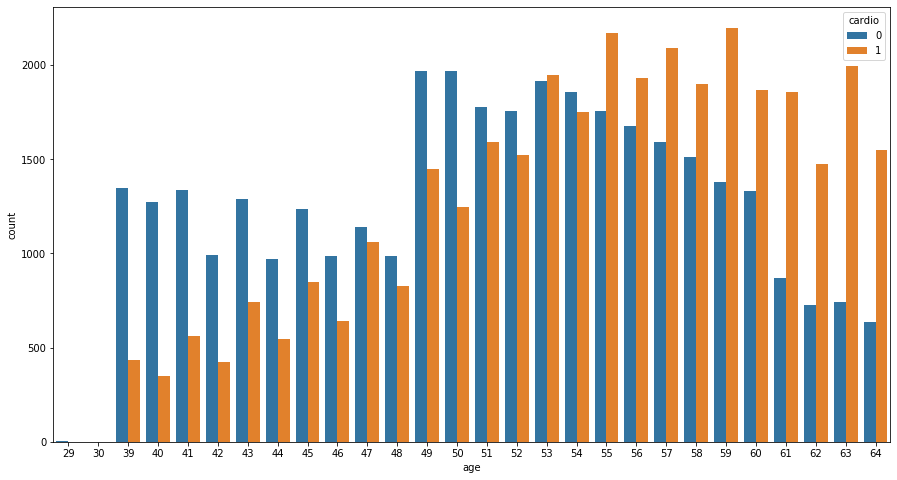

In [9]:
# Plotting a graph between the age and the cardio column in the dataset.

rcParams['figure.figsize']=(15,8)
sns.countplot(x='age',hue='cardio',data=dataset)


In [10]:
#selecting the list of features and labels in the dataset.

feature=['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']
labels=['cardio']

In [11]:
features=dataset[feature]
Y=dataset[labels]


In [12]:
#Importing the OneHotEncoder for label encodding in the label column.
from sklearn.preprocessing import OneHotEncoder


onehotencoder = OneHotEncoder()

y_labels = onehotencoder.fit_transform(Y).toarray()

In [13]:
#importing prepreocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [14]:
#feature labelling.
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(Y)

#Feature Scaling
standard_scaler = StandardScaler()
features= standard_scaler.fit_transform(features)


In [15]:
# Printing the correlation Matrix of the dataset.
correlation_matrix = dataset.corr()
correlation_matrix

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003814,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003814,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,0.003502,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


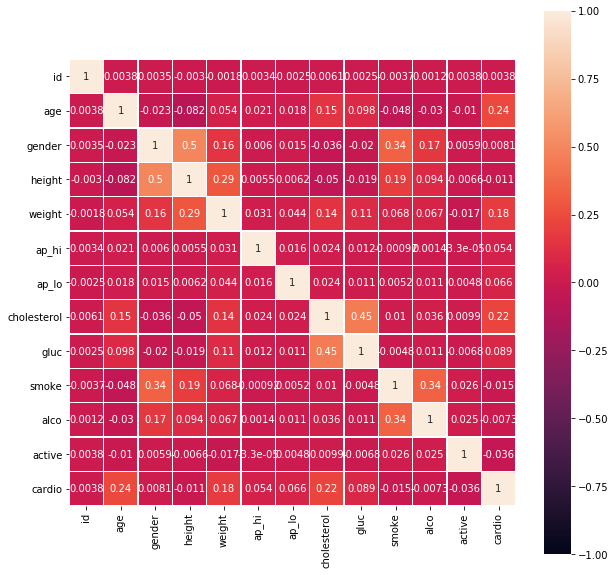

In [16]:
#Plotting the heatmap of the correlation matrix
plt.subplots(figsize=(10,10))

heatmap = sns.heatmap(correlation_matrix,mask=None,square=True, linewidths= 0.5,annot= True,vmin=-1,vmax=1)

In [17]:
#Importing principal component analysis for feature selection
from sklearn.decomposition import PCA


training_pca = PCA(n_components = 2)
training_pca.fit(features)

transform_pca = training_pca.transform(features)



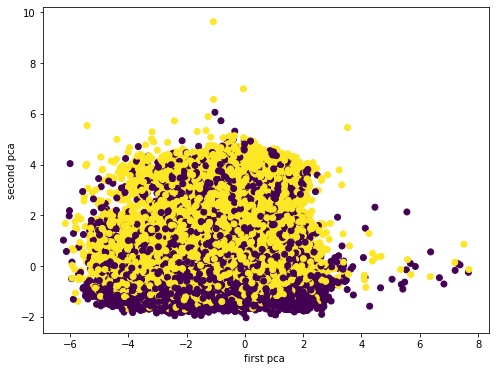

In [18]:
plt.figure(figsize = (8,6))
plt.scatter(transform_pca[:,0], transform_pca[:,1], c=y)
plt.xlabel('first pca ')
plt.ylabel('second pca')
plt.show()

In [19]:
#Splitting the dataset into training set and test set.
x_train,x_test,y_train,y_test = train_test_split(features,Y,test_size=0.2)


In [43]:
# Training and accuracy testing of the decision tree algorithm. 
model_DTC = DecisionTreeClassifier()


model_DTC = model_DTC.fit(x_train,y_train)


y_pred_value = model_DTC.predict(x_test)


print("Accuracy Using the decision Tree Algorithm:",metrics.accuracy_score(y_test, y_pred_value))

Accuracy Using the decision Tree Algorithm: 0.6385714285714286


In [44]:
#Training and accracy testing of the support vector machine algorithm.
from sklearn import svm

svm=svm.SVC()

svm.fit(x_train,y_train)

y_pred= svm.predict(x_test)

print("Accuracy Using the Support Vector Machine:",metrics.accuracy_score(y_test, y_pred))

Accuracy Using the Support Vector Machine: 0.734


In [23]:
#Training and testing of the Logistic Regression algorithm.
from sklearn.linear_model import LogisticRegression


LR_model = LogisticRegression()

LR_model.fit(x_train,y_train)

y_pred = LR_model.predict(x_test)

print("Accuracy Using The Logistic Regression Algorithm:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7194285714285714


In [24]:
#Training and testing of the Random Forest Classifier. 
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

RFC.fit(x_train,y_train)

y_pred = RFC.predict(x_test)

print("Accuracy Using The Random Forest Algorithm:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7119285714285715


In [22]:

#Importing Keras libraries
import keras
from keras import layers
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers import GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
import keras.callbacks
from keras.models import load_model


Using TensorFlow backend.


In [25]:

# Dense ANN modelleing
simple_ANN = Sequential()
simple_ANN.add(layers.Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
simple_ANN.add(layers.Dense(512, activation='relu'))
simple_ANN.add(layers.Dense(512, activation='relu'))
simple_ANN.add(layers.Dense(2, activation='softmax'))
simple_ANN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
classifier = simple_ANN.fit(x_train,y_train,epochs=1000,batch_size=128)

Epoch 1/1000
438/438 [==============================] - 3s 7ms/step - loss: 0.5813 - accuracy: 0.7026
Epoch 2/1000
438/438 [==============================] - 4s 8ms/step - loss: 0.5545 - accuracy: 0.7315
Epoch 3/1000
438/438 [==============================] - 3s 7ms/step - loss: 0.5466 - accuracy: 0.7326
Epoch 4/1000
438/438 [==============================] - 3s 7ms/step - loss: 0.5431 - accuracy: 0.7344
Epoch 5/1000
438/438 [==============================] - 4s 10ms/step - loss: 0.5424 - accuracy: 0.7355
Epoch 6/1000
438/438 [==============================] - 4s 10ms/step - loss: 0.5402 - accuracy: 0.7356
Epoch 7/1000
438/438 [==============================] - 4s 10ms/step - loss: 0.5399 - accuracy: 0.7362
Epoch 8/1000
438/438 [==============================] - 4s 9ms/step - loss: 0.5391 - accuracy: 0.7361
Epoch 9/1000
438/438 [==============================] - 4s 8ms/step - loss: 0.5385 - accuracy: 0.7387
Epoch 10/1000
438/438 [==============================] - 4s 9ms/step - loss: 0.